In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
iris=pd.read_csv(r"C:\Users\Yashi\IRIS\Iris.csv")
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [6]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


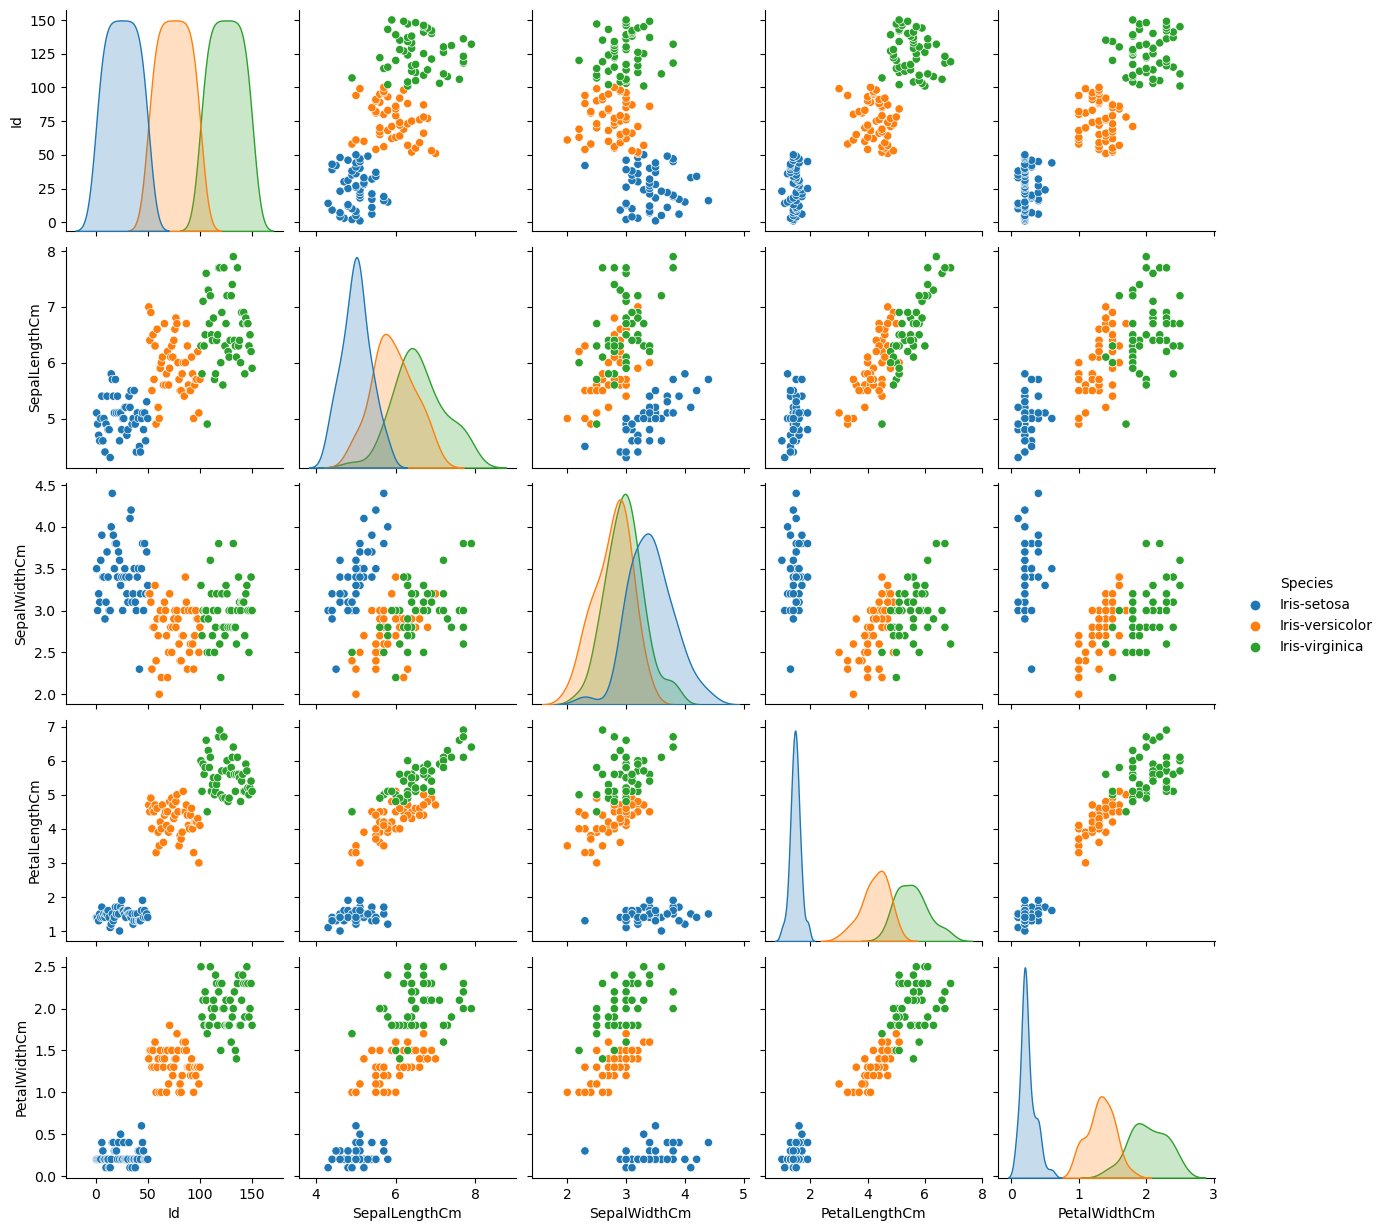

In [14]:
sns.pairplot(iris, hue="Species")
plt.show()

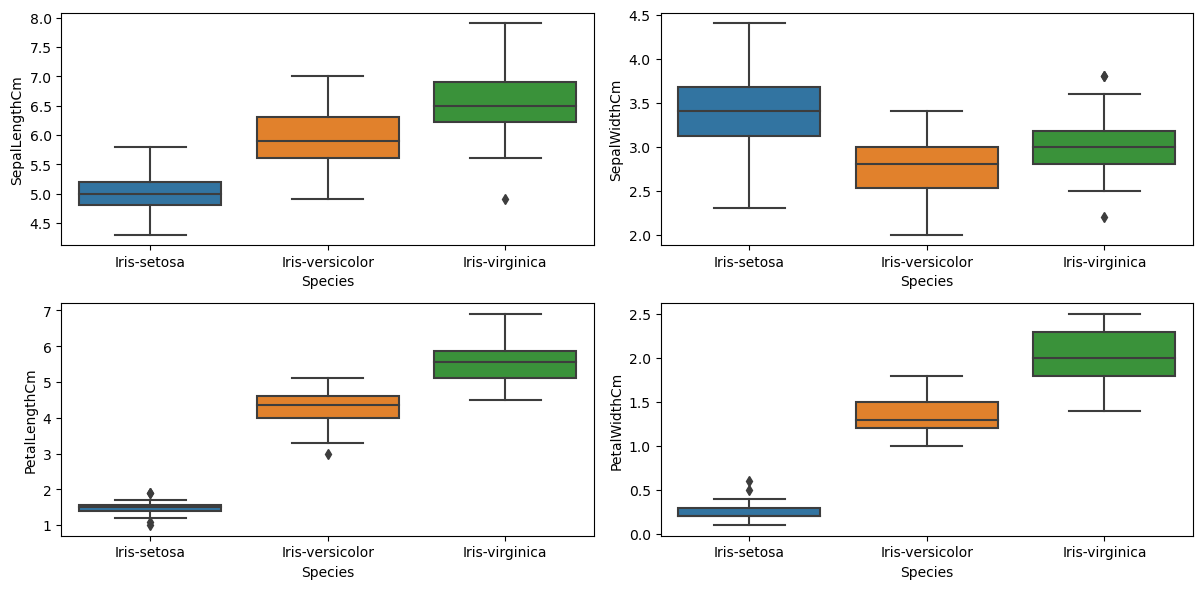

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=iris)
plt.tight_layout()
plt.show()

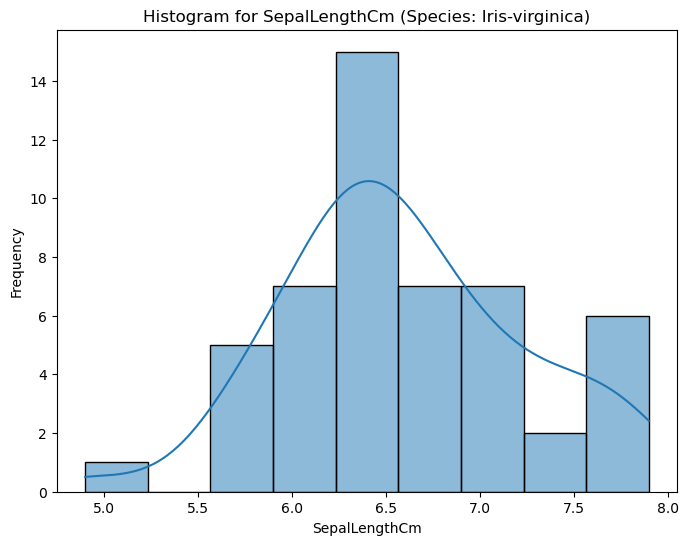

In [23]:
feature_to_check = 'SepalLengthCm'
species_to_check = 'Iris-virginica'

# Filter the data for the chosen species
filtered_data = iris[iris['Species'] == species_to_check]

# Create a histogram for the chosen feature within the filtered data
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data[feature_to_check], kde=True)
plt.xlabel(feature_to_check)
plt.ylabel('Frequency')
plt.title(f'Histogram for {feature_to_check} (Species: {species_to_check})')
plt.show()


In [26]:
from scipy import stats

# Specify the feature and species for which you want to identify potential outliers
feature_to_check = 'SepalLengthCm'
species_to_check = 'Iris-virginica'

# Filter the data for the chosen species
filtered_data = iris[iris['Species'] == species_to_check]

# Calculate Z-scores for the chosen feature within the filtered data
z_scores = np.abs(stats.zscore(filtered_data[feature_to_check]))

# Define a Z-score threshold for identifying potential outliers (e.g., Z-score > 2.5)
z_score_threshold = 2.5

# Find the indices of potential outliers
outlier_indices = np.where(z_scores > z_score_threshold)[0]

# Display the potential outliers
potential_outliers = filtered_data.iloc[outlier_indices]
print("Potential outliers:")
print(potential_outliers)

Potential outliers:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
106  107            4.9           2.5            4.5           1.7   

            Species  
106  Iris-virginica  


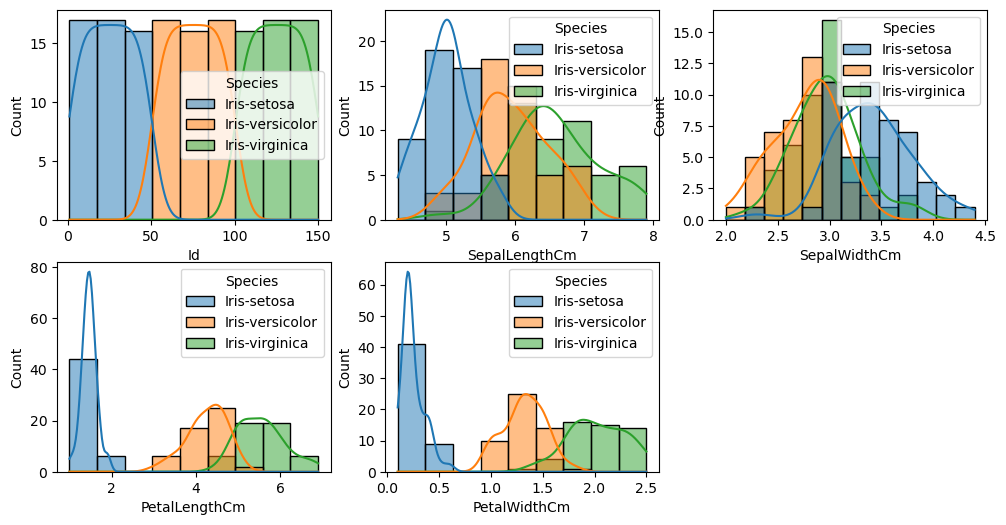

In [31]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=iris, x=feature, hue="Species", kde=True)
plt.show()


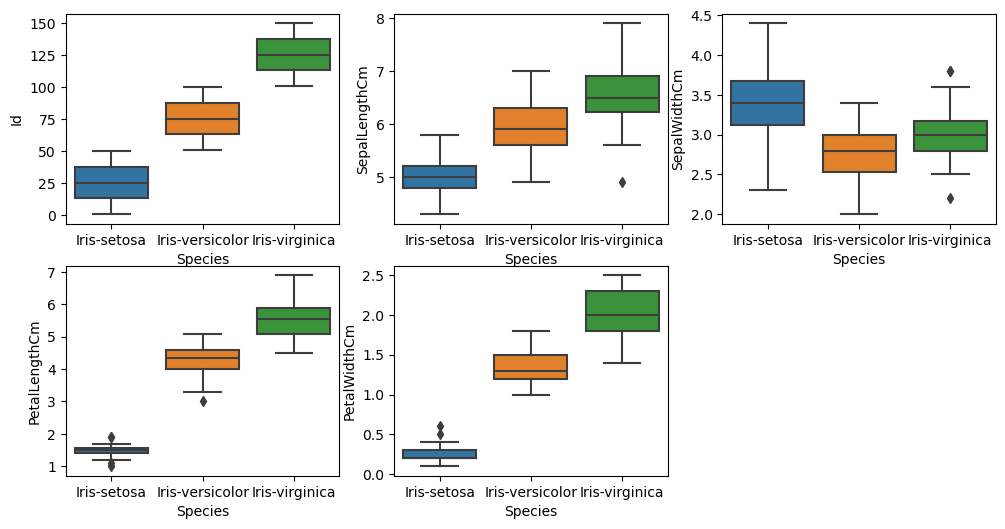

In [30]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=iris, x="Species", y=feature)
plt.show()


C:\Users\Yashi\AppData\Local\Temp\ipykernel_13484\1011489513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = iris.corr()


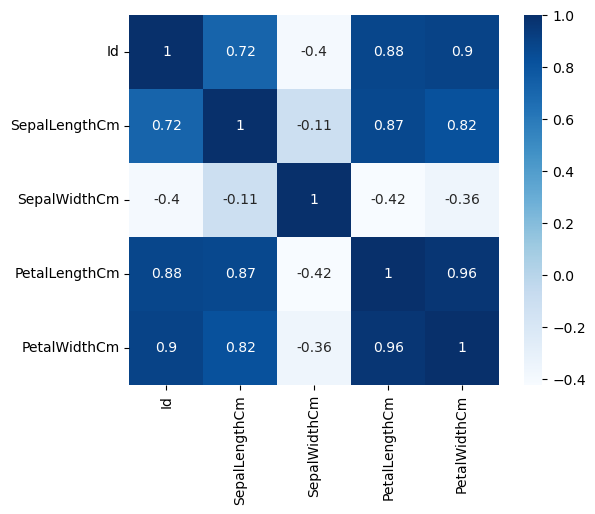

In [40]:
corr_matrix = iris.corr()
sns.heatmap(data=corr_matrix, annot=True, cmap="Blues", square=True)
plt.show()

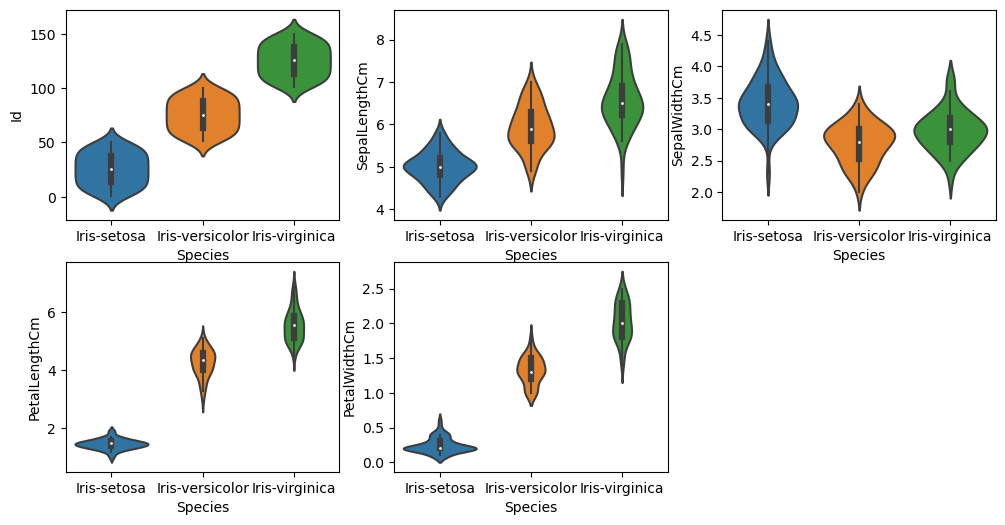

In [42]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(data=iris, x="Species", y=feature)
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
#RANDOM SHUFFLING THE DATA
iris = pd.read_csv(r"C:\Users\Yashi\IRIS\Iris.csv")
shuffled_iris = iris.sample(frac=1, random_state=13)
print(shuffled_iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
55    56            5.7           2.8            4.5           1.3   
64    65            5.6           2.9            3.6           1.3   
21    22            5.1           3.7            1.5           0.4   
101  102            5.8           2.7            5.1           1.9   
112  113            6.8           3.0            5.5           2.1   
..   ...            ...           ...            ...           ...   
126  127            6.2           2.8            4.8           1.8   
98    99            5.1           2.5            3.0           1.1   
16    17            5.4           3.9            1.3           0.4   
74    75            6.4           2.9            4.3           1.3   
82    83            5.8           2.7            3.9           1.2   

             Species  
55   Iris-versicolor  
64   Iris-versicolor  
21       Iris-setosa  
101   Iris-virginica  
112   Iris-virginica  
..               ... 

In [3]:
# SPLIT INTO TRAIN-TEST in 80:20
X = shuffled_iris.drop(['Species'], axis=1)  
y = shuffled_iris['Species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 120
Testing set size: 30


In [4]:
print(X_train)
print(X_test)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
1      2            4.9           3.0            1.4           0.2
31    32            5.4           3.4            1.5           0.4
32    33            5.2           4.1            1.5           0.1
52    53            6.9           3.1            4.9           1.5
98    99            5.1           2.5            3.0           1.1
..   ...            ...           ...            ...           ...
122  123            7.7           2.8            6.7           2.0
89    90            5.5           2.5            4.0           1.3
127  128            6.1           3.0            4.9           1.8
57    58            4.9           2.4            3.3           1.0
26    27            5.0           3.4            1.6           0.4

[120 rows x 5 columns]
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
80    81            5.5           2.4            3.8           1.1
107  108            7.3           2.9 

In [7]:
#A  DICTIONARY HOLDING THE CLASSIFIER FUNCTIONS TO BE USED ALONG WITH THEIR NAMES
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# TRAINING USING EACH CLASSIFIER AND EVALUATION
results = {}
for c_name, c in classifiers.items():
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{c_name}: F1 Score = {f1}","Acc=", accuracy_score(y_test,y_pred))


Logistic Regression: F1 Score = 1.0 Acc= 1.0
Decision Tree: F1 Score = 1.0 Acc= 1.0
Random Forest: F1 Score = 1.0 Acc= 1.0
Support Vector Machine: F1 Score = 1.0 Acc= 1.0
K-Nearest Neighbors: F1 Score = 1.0 Acc= 1.0
Naive Bayes: F1 Score = 1.0 Acc= 1.0


We can use any of the above classifiers. Since the dataset is small and simple Decision Tree and Naive Bayes would be best suited.